<a href="https://colab.research.google.com/github/aliya156/haihua_INFO5731_Spring2023/blob/main/5731_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')
from selenium.webdriver.support.ui import WebDriverWait as wait
import pandas as pd
import time

In [ ]:
d = webdriver.Chrome(executable_path=r"C:/Users/Admin/Downloads/chromedriver_win32/chromedriver.exe")
url = 'https://www.imdb.com/title/tt20255706/reviews/?ref_=tt_ql_urv'
t1 = []
r1 = []
d.get(url)
for i in range(4):
    d.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    lst_title = d.find_elements(By.CLASS_NAME, "title")
    lst_reviews = d.find_elements(By.CLASS_NAME, "text")
for j,k in zip(lst_title, lst_reviews):
    t1.append((j.text).replace('\n',''))
    r1.append(k.text)
df = pd.DataFrame(list(zip(t1, r1)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\4155563855.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  d = webdriver.Chrome(executable_path=r"C:/Users/Admin/Downloads/chromedriver_win32/chromedriver.exe")


Length of data frame is 125


,Title,Review
0,Deluded,Delusions of grandure and self important tripe...
1,Self obsessed sob story,Worst documentary I've ever watched. Que the s...
2,This guy is deluded and drinking his own sauce...,"""Wherever he goes, he's shining...like a walki..."
3,Hhahahahahahahaha!!!!!!,What an awful documentary by a jumped up narci...
4,Don't understand Amazon's motive,"How can a documentary be this bad, totally une..."
...,...,...
120,Worst MUFC Signing,I'd be more entertained if he backflipped off ...
121,Most useless video from a most useless Player!,Most useless video from a most useless Player!...
122,Deluded beyond repair,The actual audacity of this man to make a docu...
123,No hunger,This man had potential to be one of the greate...


In [ ]:
import nltk
# nltk.download()

In [ ]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\1083584843.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')


In [ ]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [ ]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('modern', 'day', 'footbal'): 4, ('wast', 'time', 'watch'): 4, ('grandeur', 'self', 'import'): 2, ('documentari', 'give', 'ever'): 2, ('sir', 'flex', 'ferguson'): 2, ('think', 'he', 'world'): 2, ('he', 'world', 'class'): 2, ('dont', 'wast', 'time'): 2, ('smile', 'lot', 'bad'): 2, ('lot', 'bad', 'vice'): 2, ...})

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

('delus', 'grandeur'):0.5
('grandeur', 'self'):0.5
('self', 'import'):0.17391304347826086
('import', 'trip'):0.16666666666666666
('trip', 'disgrac'):0.25
('disgrac', 'real'):0.2
('real', 'footbal'):0.6666666666666666
('footbal', 'went'):0.014705882352941176
('went', 'disgrac'):1.0
('disgrac', 'human'):0.2
('human', 'work'):0.14285714285714285
('work', '9'):0.125
('9', '5'):0.5
('5', 'fraction'):0.2
('fraction', 'guy'):0.5
('guy', 'ear'):0.047619047619047616
('ear', 'week'):1.0
('week', 'avoid'):0.14285714285714285
('avoid', 'dont'):0.2
('dont', 'feed'):0.05263157894736842
('feed', 'inflat'):1.0
('inflat', 'ego'):0.5
('ego', 'worst'):0.07692307692307693
('worst', 'documentari'):0.125
('documentari', 'give'):0.03125
('give', 'ever'):0.11764705882352941
('ever', 'watch'):0.05
('watch', 'que'):0.02702702702702703
('que', 'sad'):1.0
('sad', 'music'):0.16666666666666666
('music', 'play'):0.5
('play', 'act'):0.043478260869565216
('act', 'front'):0.2
('front', 'camera'):1.0
('camera', 'daub'):

In [ ]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [ ]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df  

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


,delus grandeur self import trip disgrac,real footbal,disgrac human work,fraction guy ear week,dont feed inflat ego,sad music play act front camera daub,privaci agent compar jesu,piec work manchest alway,special state club noth,week agent christ milk,...,absolut symbol narcissist parasit,man potenti,hunger succeedviru,agent part ruin career,shock touch guy,sub par,time seri episod aim,footbal tri hope level,noth averag documentari fall,shorter footbal
Review-1,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\4104235038.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\4104235038.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\4104235038.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.136326,0.077095,0.03188,0.15497,0.160576,0.074911,0.093937,0.132419,0.15497,...,0.173287,0.051795,0.173287,0.0,0.160576,0.108304,0.197304,0.110774,0.180537,0.105955
1,workers,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,due,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.051795,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,excesses,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.132419,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,shows,0.000000,0.000000,0.03188,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.110774,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,league,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1483,drag,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1484,mr,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1485,police,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
query_sentence = 'A glimpse into the life of Paul Pogba, the influential world-class French footballer'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [ ]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [ ]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,Delusions of grandure and self important tripe...,0.0
1,Worst documentary I've ever watched. Que the s...,0.045175
2,"""Wherever he goes, he's shining...like a walki...",0.0
3,What an awful documentary by a jumped up narci...,0.0
4,"How can a documentary be this bad, totally une...",0.0
...,...,...
120,I'd be more entertained if he backflipped off ...,0.0
121,Most useless video from a most useless Player!...,0.1
122,The actual audacity of this man to make a docu...,0.0
123,This man had potential to be one of the greate...,0.0


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
d = webdriver.Chrome(executable_path=r"C:/Users/Admin/Downloads/chromedriver_win32/chromedriver.exe")
url = 'https://www.imdb.com/title/tt20255706/reviews/?ref_=tt_ql_urv'
t1 = []
r1 = []
d.get(url)
for i in range(4):
    d.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    lst_title = d.find_elements(By.CLASS_NAME, "title")
    lst_reviews = d.find_elements(By.CLASS_NAME, "text")
for j,k in zip(lst_title, lst_reviews):
    t1.append((j.text).replace('\n',''))
    r1.append(k.text)
df = pd.DataFrame(list(zip(t1, r1)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\2704493077.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  d = webdriver.Chrome(executable_path=r"C:/Users/Admin/Downloads/chromedriver_win32/chromedriver.exe")


Length of data frame is 125


,Title,Review
0,Deluded,Delusions of grandure and self important tripe...
1,Self obsessed sob story,Worst documentary I've ever watched. Que the s...
2,This guy is deluded and drinking his own sauce...,"""Wherever he goes, he's shining...like a walki..."
3,Hhahahahahahahaha!!!!!!,What an awful documentary by a jumped up narci...
4,Don't understand Amazon's motive,"How can a documentary be this bad, totally une..."
...,...,...
120,Worst MUFC Signing,I'd be more entertained if he backflipped off ...
121,Most useless video from a most useless Player!,Most useless video from a most useless Player!...
122,Deluded beyond repair,The actual audacity of this man to make a docu...
123,No hunger,This man had potential to be one of the greate...


In [ ]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)

In [ ]:
from gensim.models import Word2Vec
model2 = Word2Vec(list2, sample= 300)
print(model2)

Word2Vec<vocab=269, vector_size=100, alpha=0.025>


In [ ]:
words2 = list(model2.wv.key_to_index)
print(words2)

['a', 'the', 'and', 'of', 'to', 'is', 'he', 'this', 'his', 'in', 'for', 'I', 'that', 'on', 'it', 'with', 'has', 'about', 'you', 'as', 'but', 'not', 'be', 'He', 'documentary', 'all', 'was', 'have', 'at', 'This', 'than', 'an', 'him', 'like', 'just', 'more', "he's", 'The', 'who', 'so', 'Pogba', 'even', 'one', 'will', 'how', 'when', 'no', 'can', 'football', 'being', 'time', 'if', 'or', 'what', 'are', 'see', 'been', 'If', 'player', 'guy', 'ever', 'from', 'world', 'would', 'United', 'self', 'waste', 'had', 'Paul', 'himself', 'get', 'your', 'man', 'A', 'money', 'out', 'show', 'footballer', 'much', 'never', 'watch', 'worst', 'by', 'only', 'most', 'people', 'own', 'there', 'make', 'good', 'thinks', 'they', 'bad', 'documentary.', 'into', 'then', 'up', 'nothing', 'Manchester', 'my', 'is.', 'really', 'some', 'team', 'back', "He's", 'way', 'rubbish', ',', 'thing', 'it.', 'How', 'does', 'should', 'off', 'anything', "it's", "don't", 'star', 'shows', 'do', 'footballer.', 'seen', 'which', 'think', 'pla

In [ ]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

# X = model2[model2.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
X = model2.wv[model2.wv.key_to_index.values()]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


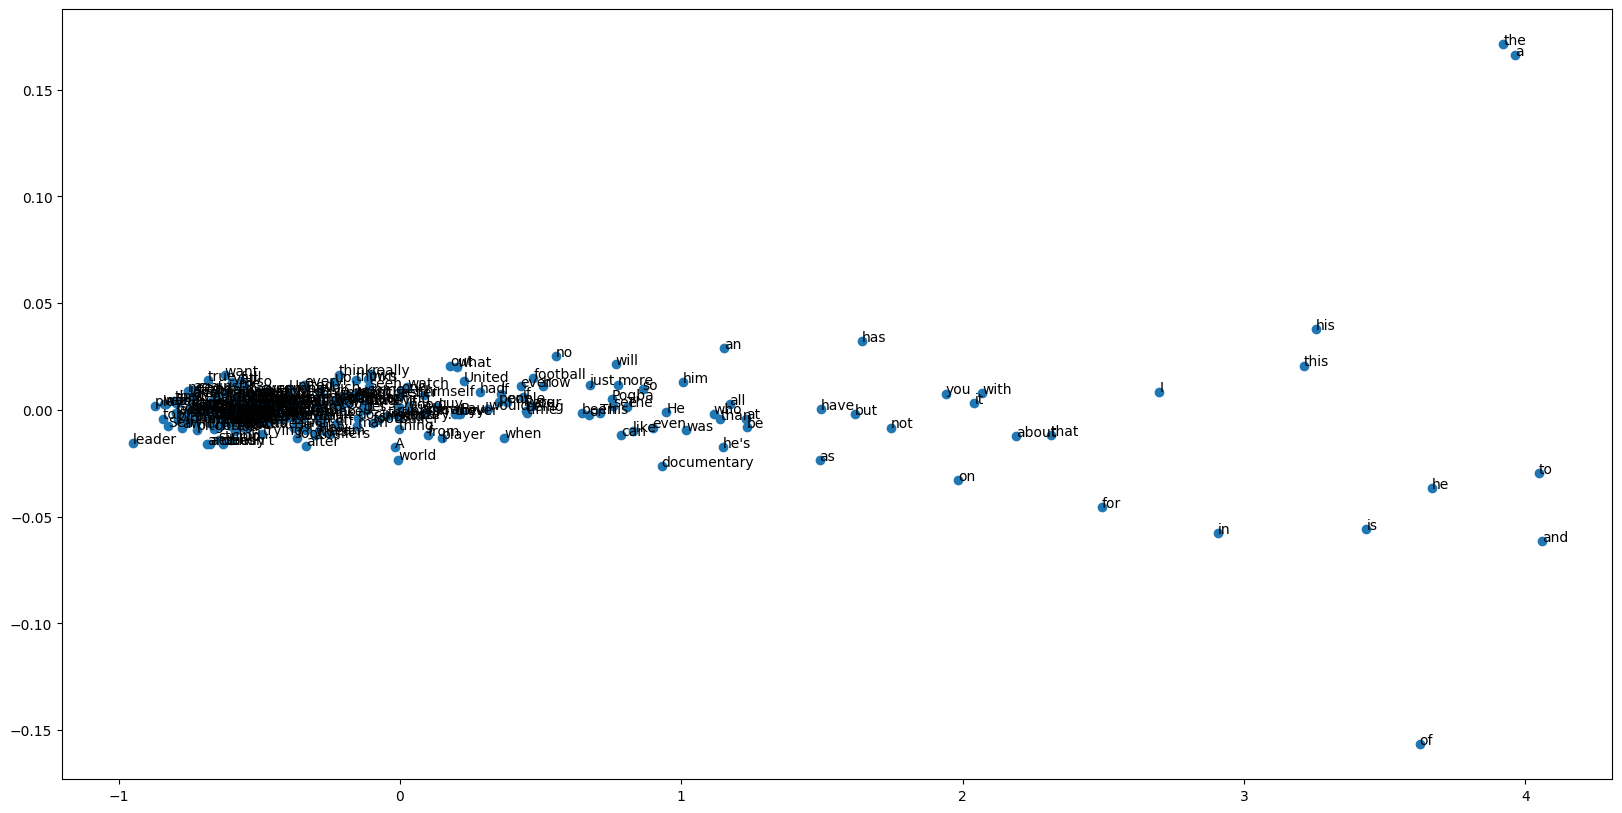

In [ ]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 

https://github.com/aliya156/haihua_INFO5731_Spring2023/blob/main/pogmentary.csv

